<a href="https://colab.research.google.com/github/MathewLipman/Work-Samples/blob/main/World_Happiness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

world_happiness = pd.read_csv('/content/drive/MyDrive/Dataset/World_Happiness_2015.csv')

In [ ]:
world_happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

Country — name of the country

Region — name of the region the country belongs to

Happiness Rank — the rank of the country, as determined by its happiness score

Happiness Score — a score assigned to each country based on the answers to a poll question that asks respondents to rate their happiness on a scale of 0-10

Family — the estimated extent to which family contributes to the happiness score

Freedom — the estimated extent to which freedom contributes to the happiness score

Generosity — the estimated extent to which generosity contributes to the happiness score

In [ ]:
world_happiness.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


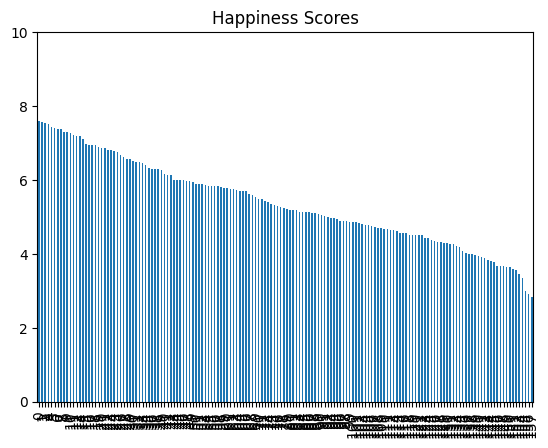

In [ ]:
world_happiness['Happiness Score'].plot(kind='bar', title='Happiness Scores', ylim=(0,10))
plt.show()

In [ ]:
world_happiness['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [ ]:
world_happiness['Region'].count()

158

In [ ]:
len(world_happiness['Region'].unique())


10

<Axes: title={'center': 'Southern Asia Happiness Scores'}, ylabel='Country'>

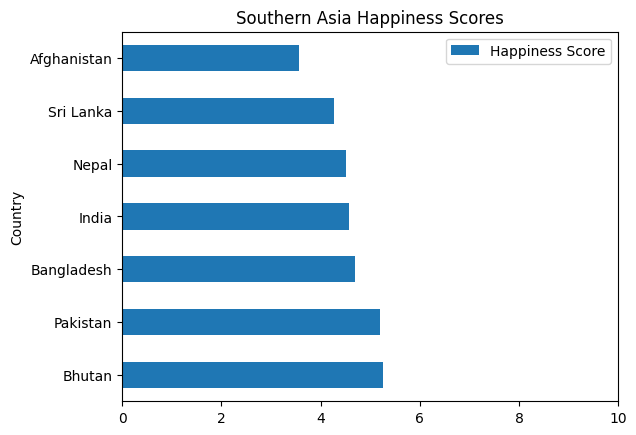

In [ ]:
so_asia = world_happiness[world_happiness['Region'] == 'Southern Asia']
so_asia.plot(x='Country', y='Happiness Score', kind='barh', title='Southern Asia Happiness Scores', xlim=(0,10))

In [ ]:
import matplotlib.pyplot as plt

for rval in world_happiness['Region'].unique():
    world_happiness[world_happiness['Region'] == rval].plot(
        x='Country', 
        y='Happiness Score', 
        kind='barh', 
        title=rval + " Happiness Score", 
        xlim=(0,10)
    )
    plt.show()


In [ ]:
import matplotlib.pyplot as plt

unique_regions = world_happiness['Region'].unique()
fig, axs = plt.subplots(len(unique_regions), 1, figsize=(10, len('unique_regions')*4.5))

for idx, reg in enumerate(unique_regions):
    temp_df = world_happiness[world_happiness['Region'] == reg]
    temp_df.plot(x='Country', y='Happiness Score', kind='barh', title=reg + " Happiness Score", xlim=(0,10), ax=axs[idx])

plt.tight_layout()
plt.show()


AttributeError: ignored

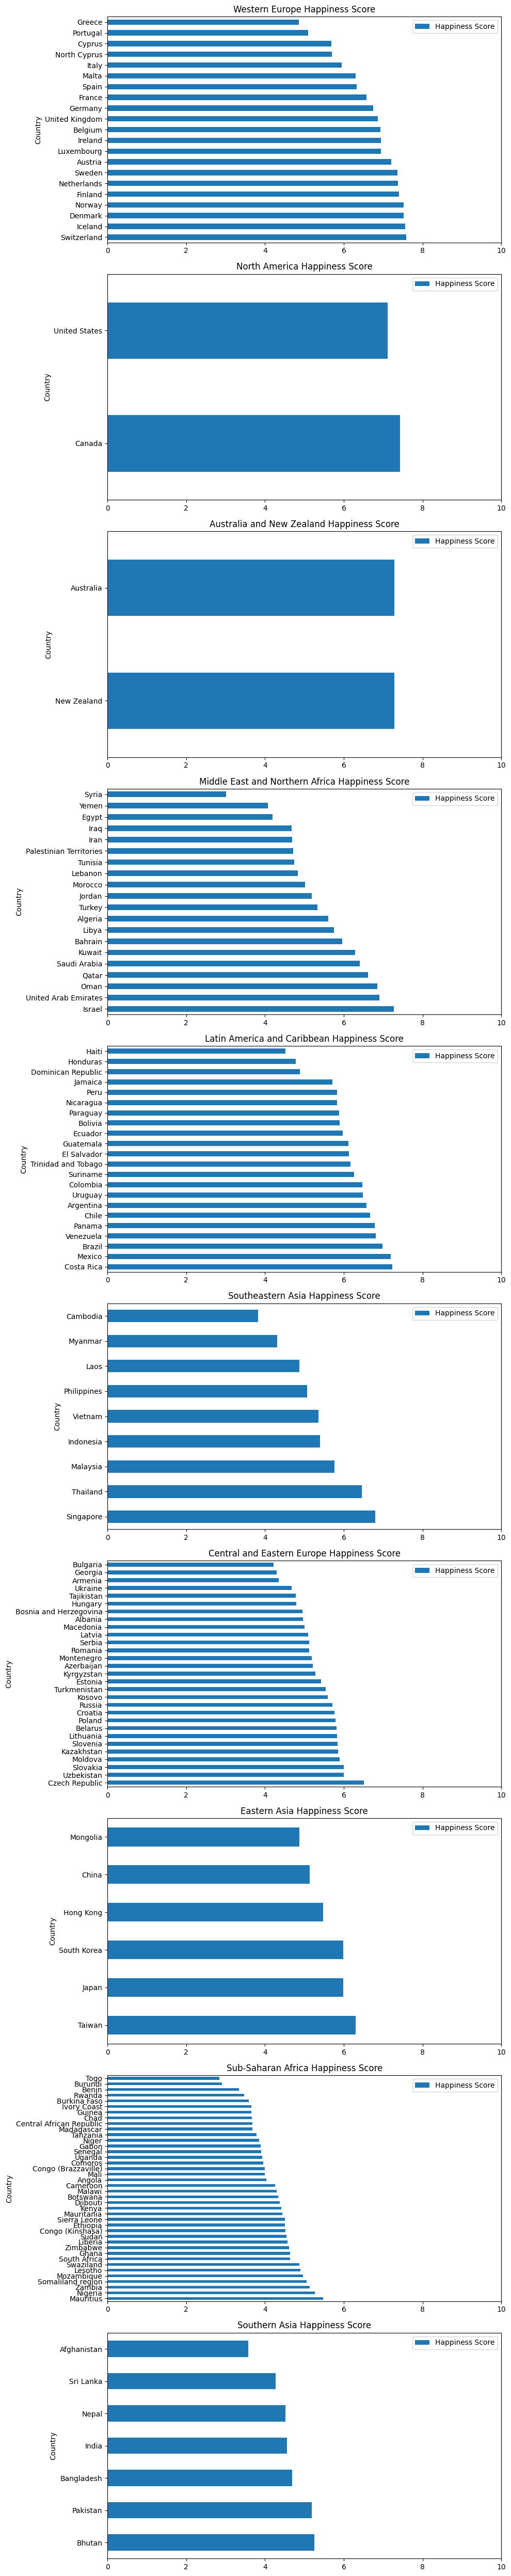

In [ ]:
import matplotlib.pyplot as plt

unique_regions = world_happiness['Region'].unique()
fig, axs = plt.subplots(len(unique_regions), 1, figsize=(10, len(unique_regions)*5))

for idx, reg in enumerate(unique_regions):
    temp_df = world_happiness[world_happiness['Region'] == reg]
    temp_df.plot(x='Country', y='Happiness Score', kind='barh', title=reg + " Happiness Score", xlim=(0,10), ax=axs[idx])

plt.tight_layout()
plt.show()


In [ ]:
world_happiness['Region'].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

In [ ]:
import matplotlib.pyplot as plt

unique_regions = world_happiness['Region'].unique()

# Create a figure
fig = plt.figure(figsize=(10, len(world_happiness['Country']) / 2)) # Adjust size as necessary

# Use GridSpec for more flexible subplot layout
gs = plt.GridSpec(len(unique_regions), 1)

for idx, reg in enumerate(unique_regions):
    temp_df = world_happiness[world_happiness['Region'] == reg]
    # Create an individual subplot with a height proportional to the number of countries in the region
    ax = fig.add_subplot(gs[idx, 0])
    temp_df.plot(x='Country', y='Happiness Score', kind='barh', title=reg + " Happiness Score", xlim=(0,10), ax=ax)

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from matplotlib import gridspec

# Get the unique regions
unique_regions = world_happiness['Region'].unique()

# Calculate total height of the plot
total_height = sum(world_happiness['Region'].value_counts())

# Create a figure
fig = plt.figure(figsize=(10, total_height*0.4)) # Adjust width as necessary, each row will be 0.2 inch

# Use GridSpec for more flexible subplot layout
gs = gridspec.GridSpec(len(unique_regions), 1, figure=fig)

for idx, reg in enumerate(unique_regions):
    temp_df = world_happiness[world_happiness['Region'] == reg]
    
    # Calculate height ratio for the current region
    height_ratio = len(temp_df) / total_height
    
    # Create an individual subplot with a height proportional to the number of countries in the region
    ax = fig.add_subplot(gs[idx, 0])
    
    temp_df.plot(x='Country', y='Happiness Score', kind='barh', title=reg + " Happiness Score", xlim=(0,10), ax=ax)

# Use tight_layout to adjust subplot parameters for a nice fit
plt.tight_layout()
plt.show()


Let's break down the code we wrote on the previous screen into three steps:

split the DataFrame into groups
apply a function to each group
combine the results into one data structure
mean_happiness = {}
regions = happiness2015['Region'].unique()
​
for r in regions:
    #1. Split the DataFrame into groups.
    region_group = happiness2015[happiness2015['Region'] == r]
    #2. Apply a function to each group.
    region_mean = region_group['Happiness Score'].mean()
    #3. Combine the results into one data structure.
    mean_happiness[r] = region_mean

Explain

In [ ]:
mean_happiness = {}
regions = world_happiness['Region'].unique()
for r in regions:
    region_group = world_happiness[world_happiness['Region'] == r]
    region_mean = region_group['Happiness Score'].mean()
    mean_happiness[r] = region_mean
print(mean_happiness)

{'Western Europe': 6.689619047619048, 'North America': 7.273, 'Australia and New Zealand': 7.285, 'Middle East and Northern Africa': 5.406899999999999, 'Latin America and Caribbean': 6.1446818181818195, 'Southeastern Asia': 5.317444444444444, 'Central and Eastern Europe': 5.332931034482757, 'Eastern Asia': 5.626166666666666, 'Sub-Saharan Africa': 4.2028, 'Southern Asia': 4.580857142857143}


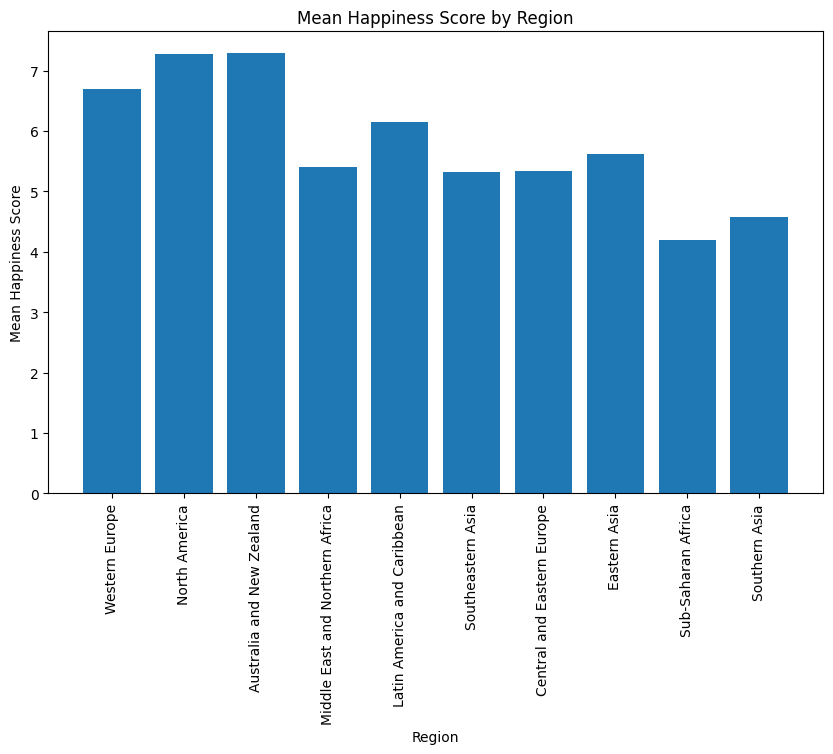

In [ ]:


plt.figure(figsize=(10,6))
plt.bar(mean_happiness.keys(), mean_happiness.values())
plt.xlabel('Region')
plt.ylabel('Mean Happiness Score')
plt.title('Mean Happiness Score by Region')
plt.xticks(rotation=90) # Rotate labels for better readability
plt.show()


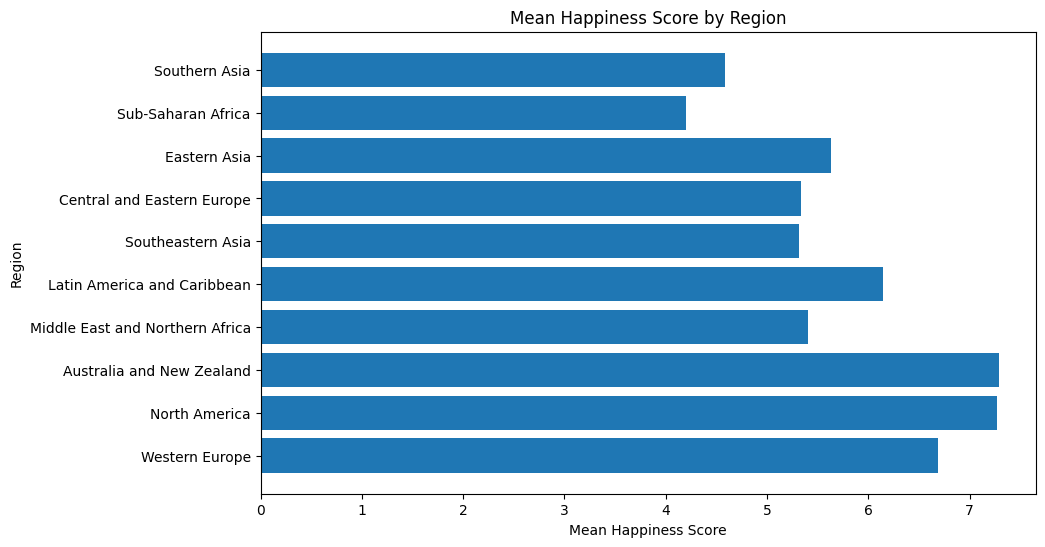

In [ ]:
plt.figure(figsize=(10,6))
plt.barh(list(mean_happiness.keys()), list(mean_happiness.values()))
plt.ylabel('Region')
plt.xlabel('Mean Happiness Score')
plt.title('Mean Happiness Score by Region')
plt.show()


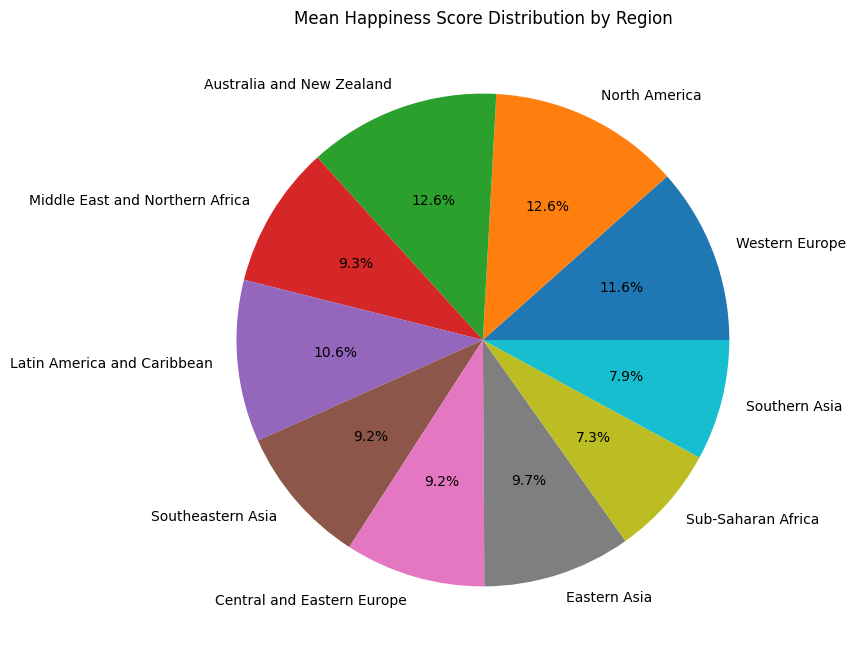

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(mean_happiness.values(), labels=mean_happiness.keys(), autopct='%1.1f%%')
plt.title('Mean Happiness Score Distribution by Region')
plt.show()


In [ ]:
reg_mean = world_happiness.groupby('Region')['Economy (GDP per Capita)'].mean()
print(reg_mean)

Region
Australia and New Zealand          1.291880
Central and Eastern Europe         0.942438
Eastern Asia                       1.151780
Latin America and Caribbean        0.876815
Middle East and Northern Africa    1.066974
North America                      1.360400
Southeastern Asia                  0.789054
Southern Asia                      0.560486
Sub-Saharan Africa                 0.380473
Western Europe                     1.298596
Name: Economy (GDP per Capita), dtype: float64


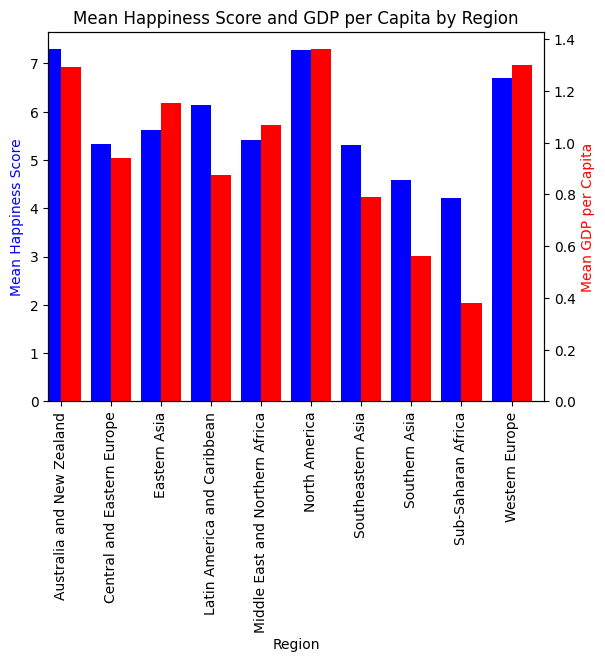

In [ ]:
import matplotlib.pyplot as plt

# Calculate mean happiness score and GDP per capita for each region
mean_happiness = world_happiness.groupby('Region')['Happiness Score'].mean()
mean_gdp = world_happiness.groupby('Region')['Economy (GDP per Capita)'].mean()

# Create figure and axis objects
fig, ax1 = plt.subplots()

# Plot mean happiness score as a bar chart
mean_happiness.plot(kind='bar', color='blue', ax=ax1, width=0.4, position=1)

# Create a second axis for the GDP per capita
ax2 = ax1.twinx()

# Plot mean GDP per capita as a bar chart
mean_gdp.plot(kind='bar', color='red', ax=ax2, width=0.4, position=0)

# Set labels and title
ax1.set_ylabel('Mean Happiness Score', color='blue')
ax2.set_ylabel('Mean GDP per Capita', color='red')
plt.title('Mean Happiness Score and GDP per Capita by Region')
plt.xticks(rotation=90) # Rotate labels for better readability

plt.show()

# Now, let's create a scatter plot to visualize the relationship between mean


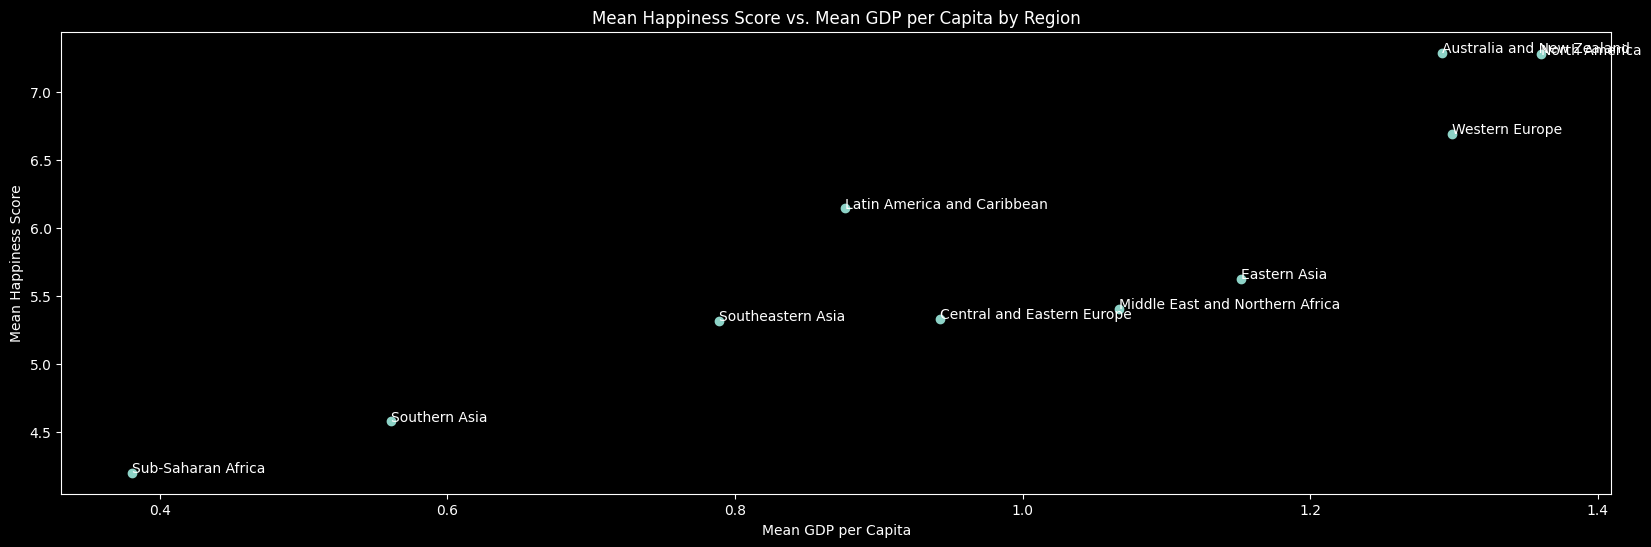

In [ ]:
import matplotlib.style as style 
style.use('dark_background')
plt.figure(figsize=(20,6))
plt.scatter(mean_gdp, mean_happiness)
for i, txt in enumerate(mean_happiness.index):
    plt.annotate(txt,(mean_gdp[i], mean_happiness[i])) # this adds the region names as labels for each point
plt.xlabel('Mean GDP per Capita')
plt.ylabel('Mean Happiness Score')
plt.title('Mean Happiness Score vs. Mean GDP per Capita by Region')
plt.show()

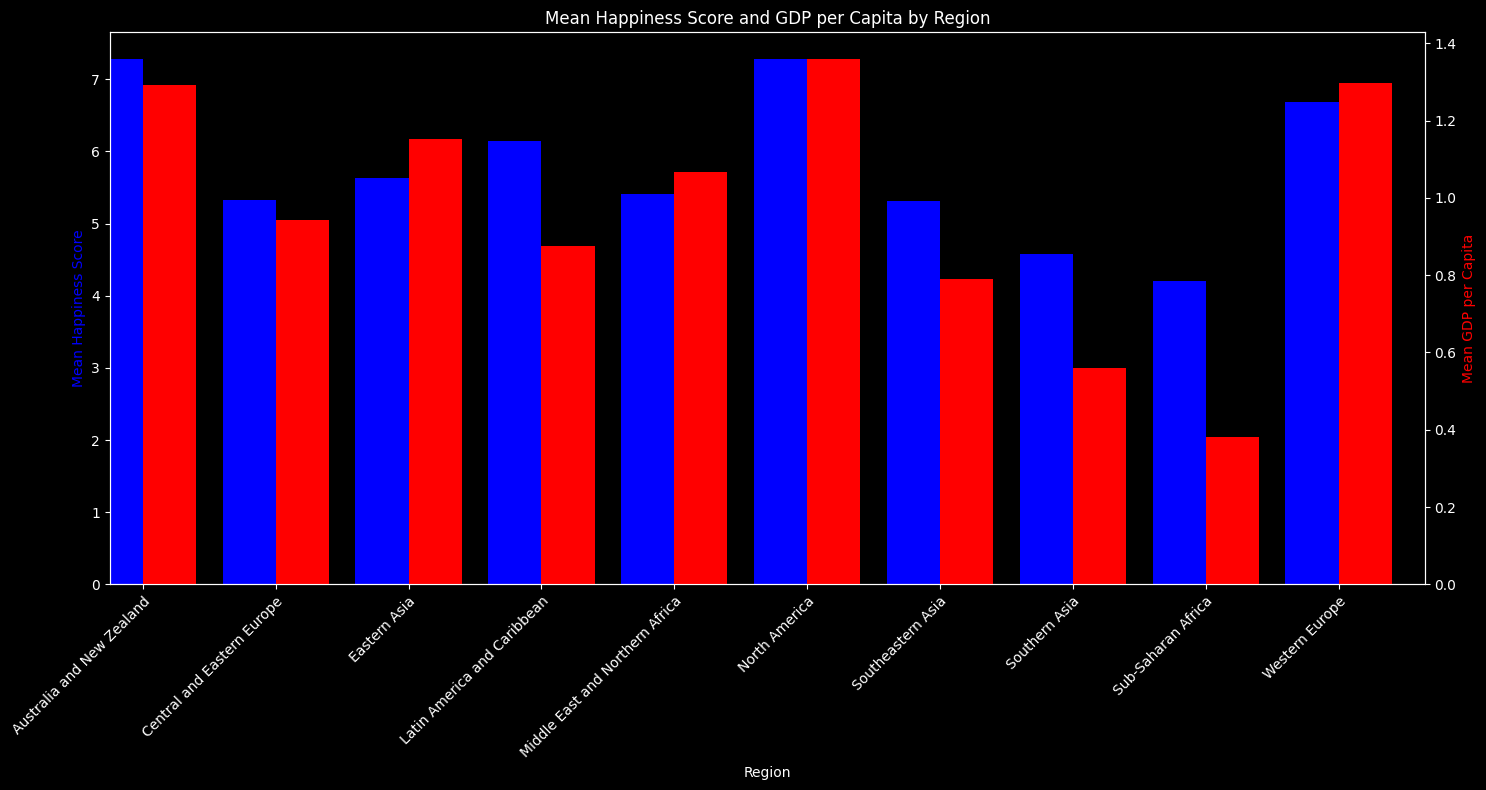

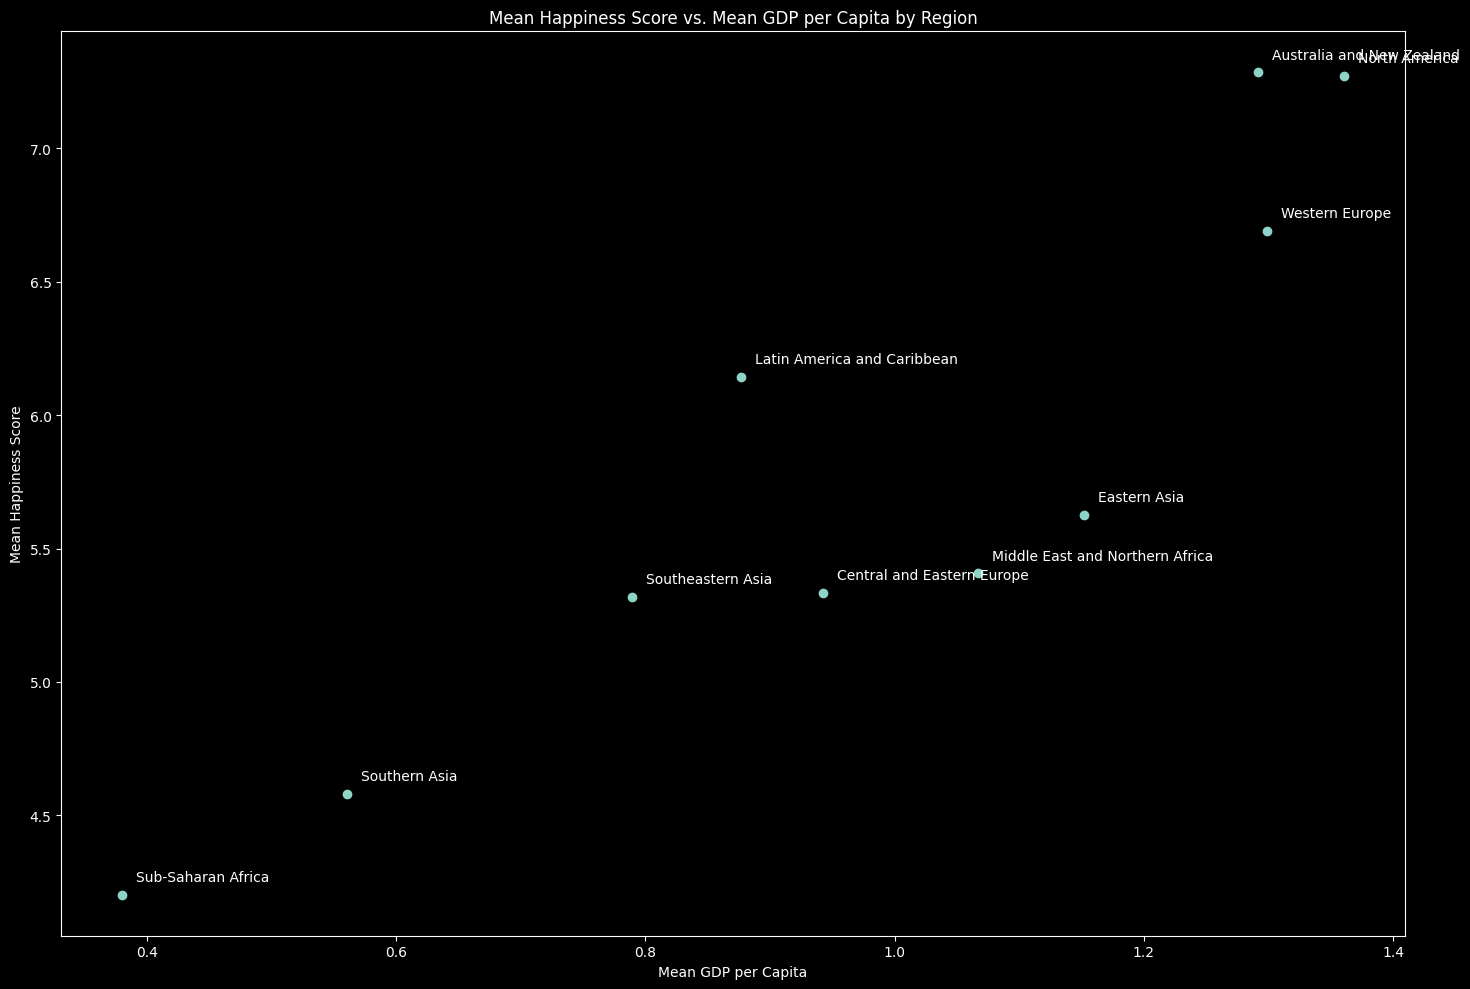

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create figure and axis objects with larger size
fig, ax1 = plt.subplots(figsize=(15, 8)) 

# Plot mean happiness score as a bar chart
mean_happiness.plot(kind='bar', color='blue', ax=ax1, width=0.4, position=1)

# Create a second axis for the GDP per capita
ax2 = ax1.twinx()

# Plot mean GDP per capita as a bar chart
mean_gdp.plot(kind='bar', color='red', ax=ax2, width=0.4, position=0)

# Set labels and title
ax1.set_ylabel('Mean Happiness Score', color='blue')
ax2.set_ylabel('Mean GDP per Capita', color='red')
plt.title('Mean Happiness Score and GDP per Capita by Region')

# Rotate x-axis labels and adjust their position
plt.setp(ax1.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

plt.tight_layout()
plt.show()

# For scatter plot
plt.figure(figsize=(15,10)) # Increase the size of the plot
plt.scatter(mean_gdp, mean_happiness)

# Annotate with region names
for i, txt in enumerate(mean_happiness.index):
    plt.annotate(txt, (mean_gdp[i], mean_happiness[i]), xytext=(10,10), textcoords='offset points')
plt.xlabel('Mean GDP per Capita')
plt.ylabel('Mean Happiness Score')
plt.title('Mean Happiness Score vs. Mean GDP per Capita by Region')
plt.tight_layout()
plt.show()


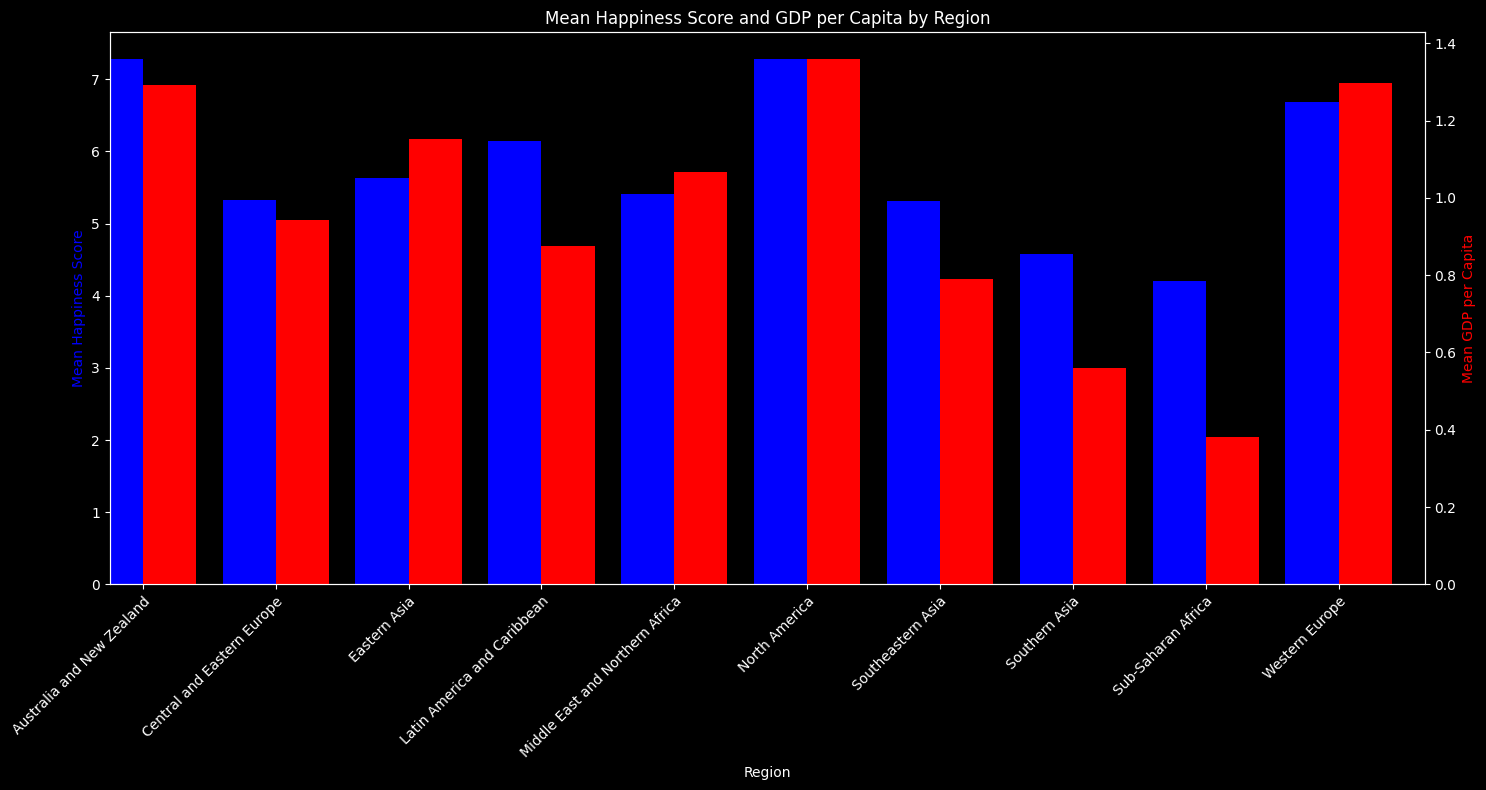

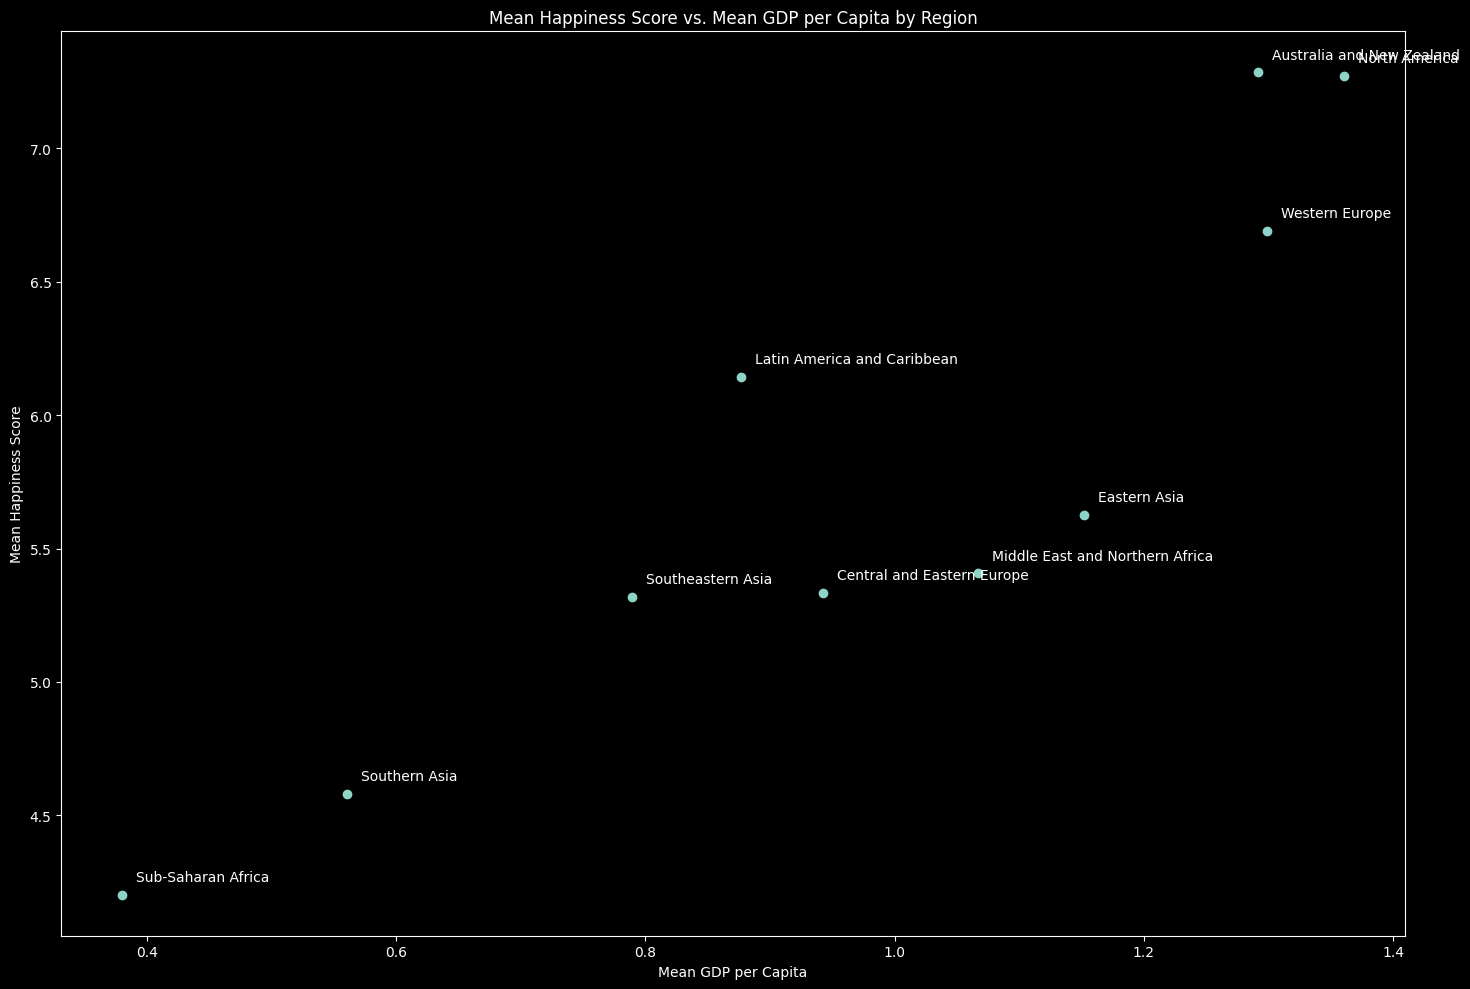

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create figure and axis objects with larger size
fig, ax1 = plt.subplots(figsize=(15, 8)) 

# Plot mean happiness score as a bar chart
mean_happiness.plot(kind='bar', color='blue', ax=ax1, width=0.4, position=1)

# Create a second axis for the GDP per capita
ax2 = ax1.twinx()

# Plot mean GDP per capita as a bar chart
mean_gdp.plot(kind='bar', color='red', ax=ax2, width=0.4, position=0)

# Set labels and title
ax1.set_ylabel('Mean Happiness Score', color='blue')
ax2.set_ylabel('Mean GDP per Capita', color='red')
plt.title('Mean Happiness Score and GDP per Capita by Region')

# Rotate x-axis labels and adjust their position
plt.setp(ax1.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

plt.tight_layout()
plt.show()

# For scatter plot
plt.figure(figsize=(15,10)) # Increase the size of the plot
plt.scatter(mean_gdp, mean_happiness)

# Annotate with region names
for i, txt in enumerate(mean_happiness.index):
    plt.annotate(txt, (mean_gdp[i], mean_happiness[i]), xytext=(10,10), textcoords='offset points')
plt.xlabel('Mean GDP per Capita')
plt.ylabel('Mean Happiness Score')
plt.title('Mean Happiness Score vs. Mean GDP per Capita by Region')
plt.tight_layout()
plt.show()


In [ ]:
pip install adjustText

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


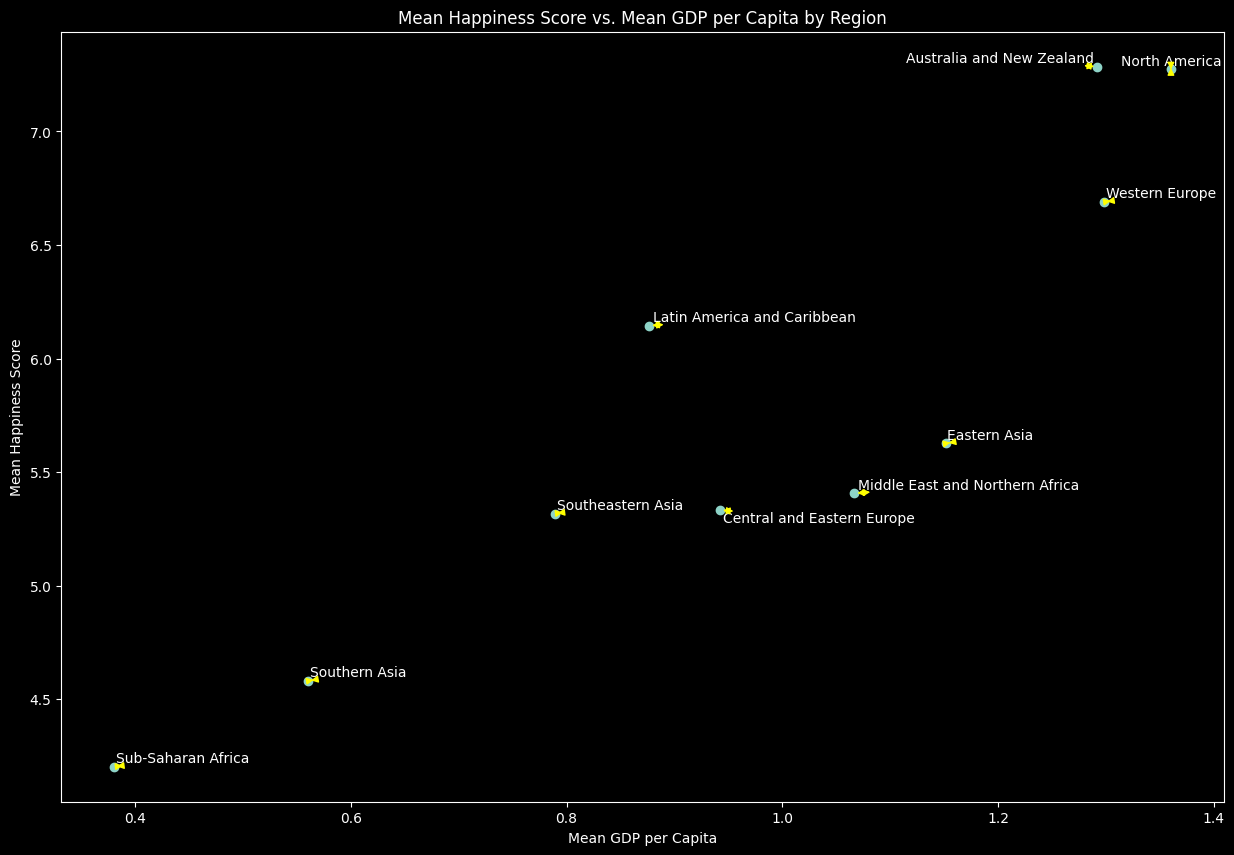

In [ ]:
from adjustText import adjust_text

# Create the scatter plot
plt.figure(figsize=(15,10))
plt.scatter(mean_gdp, mean_happiness)

# Create a list to hold the text objects
texts = []

for i, txt in enumerate(mean_happiness.index):
    texts.append(plt.text(mean_gdp[i], mean_happiness[i], txt))

# Adjust the position of the text labels
adjust_text(texts, arrowprops=dict(arrowstyle='<|-|>', color='yellow'))

plt.xlabel('Mean GDP per Capita')
plt.ylabel('Mean Happiness Score')
plt.title('Mean Happiness Score vs. Mean GDP per Capita by Region')

plt.show()


In [ ]:
grouped = world_happiness.groupby('Region')
aus_nz = grouped.get_group('Australia and New Zealand')


In [ ]:
print(grouped.groups)

{'Australia and New Zealand': [8, 9], 'Central and Eastern Europe': [30, 43, 44, 51, 53, 54, 55, 58, 59, 61, 63, 68, 69, 72, 76, 79, 82, 85, 86, 88, 92, 94, 95, 103, 105, 110, 126, 129, 133], 'Eastern Asia': [37, 45, 46, 71, 83, 99], 'Latin America and Caribbean': [11, 13, 15, 22, 24, 26, 29, 31, 32, 39, 40, 41, 42, 47, 50, 52, 56, 57, 64, 97, 104, 118], 'Middle East and Northern Africa': [10, 19, 21, 27, 34, 38, 48, 62, 67, 75, 81, 91, 102, 106, 107, 109, 111, 134, 135, 155], 'North America': [4, 14], 'Southeastern Asia': [23, 33, 60, 73, 74, 89, 98, 128, 144], 'Southern Asia': [78, 80, 108, 116, 120, 131, 152], 'Sub-Saharan Africa': [70, 77, 84, 90, 93, 96, 100, 112, 113, 114, 115, 117, 119, 121, 122, 123, 124, 125, 127, 130, 132, 136, 137, 138, 139, 140, 141, 142, 143, 145, 146, 147, 148, 149, 150, 151, 153, 154, 156, 157], 'Western Europe': [0, 1, 2, 3, 5, 6, 7, 12, 16, 17, 18, 20, 25, 28, 35, 36, 49, 65, 66, 87, 101]}


In [ ]:
world_happiness.iloc[8:10]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [ ]:
na = world_happiness.iloc[[4,14]]
print(na)

          Country         Region  Happiness Rank  Happiness Score  \
4          Canada  North America               5            7.427   
14  United States  North America              15            7.119   

    Standard Error  Economy (GDP per Capita)   Family  \
4          0.03553                   1.32629  1.32261   
14         0.03839                   1.39451  1.24711   

    Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
4                    0.90563  0.63297                        0.32957   
14                   0.86179  0.54604                        0.15890   

    Generosity  Dystopia Residual  
4      0.45811            2.45176  
14     0.40105            2.51011  


In [ ]:
na_grouped = world_happiness.groupby('Region').get_group('North America')
print(na_grouped)

          Country         Region  Happiness Rank  Happiness Score  \
4          Canada  North America               5            7.427   
14  United States  North America              15            7.119   

    Standard Error  Economy (GDP per Capita)   Family  \
4          0.03553                   1.32629  1.32261   
14         0.03839                   1.39451  1.24711   

    Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
4                    0.90563  0.63297                        0.32957   
14                   0.86179  0.54604                        0.15890   

    Generosity  Dystopia Residual  
4      0.45811            2.45176  
14     0.40105            2.51011  


In [ ]:
ca = na_grouped.groupby('Country').get_group('Canada')
print(ca)

  Country         Region  Happiness Rank  Happiness Score  Standard Error  \
4  Canada  North America               5            7.427         0.03553   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
4                   1.32629  1.32261                   0.90563  0.63297   

   Trust (Government Corruption)  Generosity  Dystopia Residual  
4                        0.32957     0.45811            2.45176  


In [ ]:
print(world_happiness)

         Country                           Region  Happiness Rank  \
0    Switzerland                   Western Europe               1   
1        Iceland                   Western Europe               2   
2        Denmark                   Western Europe               3   
3         Norway                   Western Europe               4   
4         Canada                    North America               5   
..           ...                              ...             ...   
153       Rwanda               Sub-Saharan Africa             154   
154        Benin               Sub-Saharan Africa             155   
155        Syria  Middle East and Northern Africa             156   
156      Burundi               Sub-Saharan Africa             157   
157         Togo               Sub-Saharan Africa             158   

     Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
0              7.587         0.03411                   1.39651  1.34951   
1              7.561 

  # Filter the DataFrame for the given region
    region_df = world_happiness.groupby('Region').get_group(region)

    # Melt the DataFrame to reshape it suitable for seaborn
    region_df_melt = region_df.melt(id_vars='Country')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame for the North America region
region_df = world_happiness[world_happiness['Region'] == 'North America']

# Melt the DataFrame to reshape it suitable for seaborn
region_df_melt = region_df.melt(id_vars='Country')

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x='variable', y='value', hue='Country', data=region_df_melt)

plt.title('Comparison of North American Countries')
plt.ylabel('Value')
plt.xlabel('Metric')
plt.xticks(rotation=90)  # Rotate labels for better visibility
plt.tight_layout()  # Adjust subplot parameters to give specified padding
plt.show()


TypeError: ignored

<Figure size 1000x800 with 0 Axes>

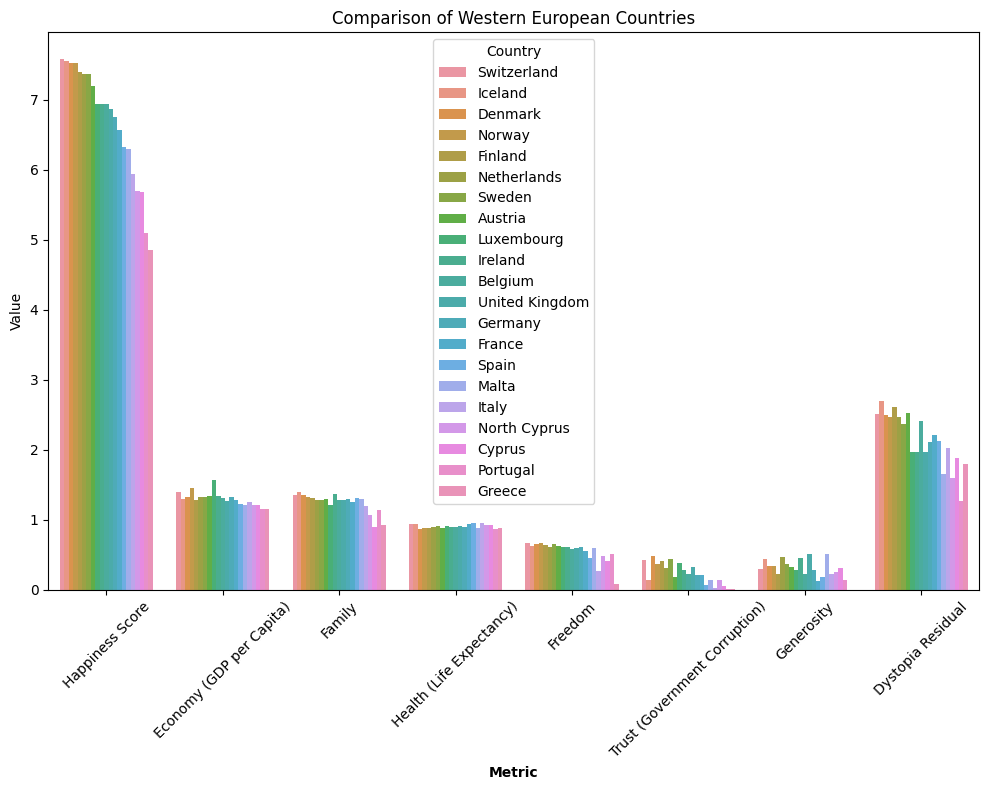

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame for the North America region
region_df = world_happiness[world_happiness['Region'] == 'Western Europe']

# List of numeric columns (excluding 'Country' and 'Region')
numeric_cols = ['Happiness Score',  
                'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 
                'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']

# Melt the DataFrame to reshape it suitable for seaborn
region_df_melt = region_df.melt(id_vars='Country', value_vars=numeric_cols)

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x='variable', y='value', hue='Country', data=region_df_melt)

plt.title('Comparison of Western European Countries')
plt.ylabel('Value')
plt.xlabel('Metric', alpha=1, weight='bold')
plt.xticks(rotation=45)  # Rotate labels for better visibility
plt.tight_layout()  # Adjust subplot parameters to give specified padding
plt.show()


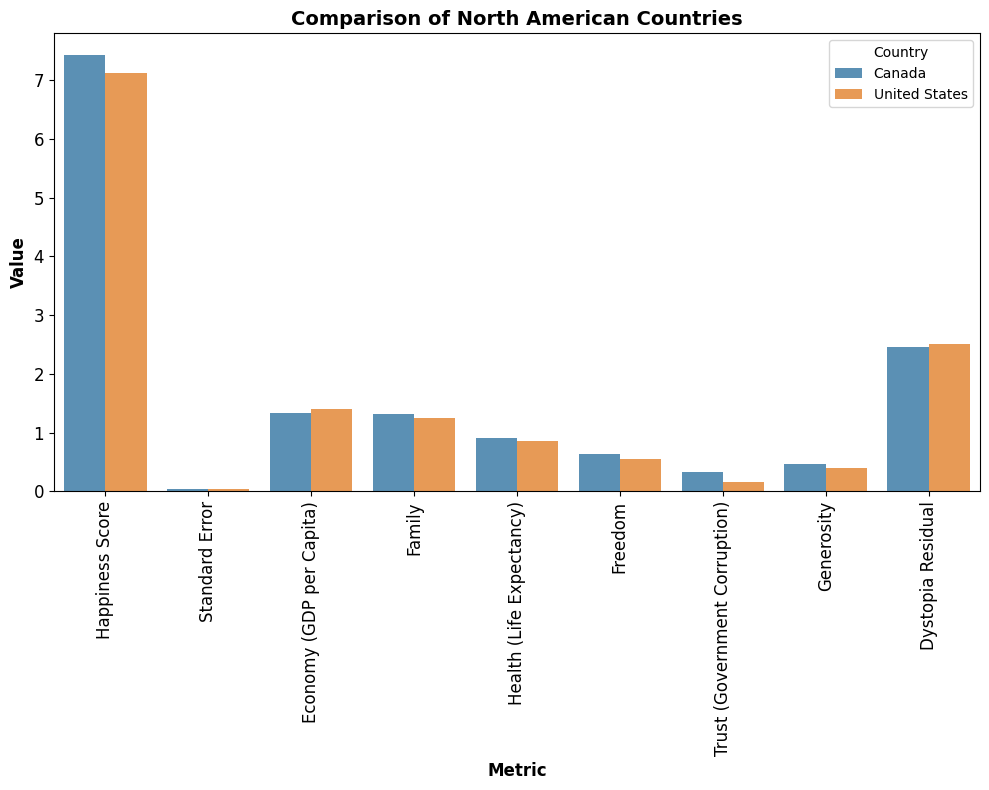

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame for the North America region
region_df = world_happiness[world_happiness['Region'] == 'North America']

# List of numeric columns (excluding 'Country', 'Region', and 'Happiness Rank')
numeric_cols = ['Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 
                'Family', 'Health (Life Expectancy)', 'Freedom', 
                'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']

# Melt the DataFrame to reshape it suitable for seaborn
region_df_melt = region_df.melt(id_vars='Country', value_vars=numeric_cols)

# Increase label size
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x='variable', y='value', hue='Country', data=region_df_melt, alpha=0.8)

plt.title('Comparison of North American Countries', weight='bold', size=14)
plt.ylabel('Value', weight='bold', size=12)
plt.xlabel('Metric', weight='bold', size = 12)
plt.xticks(rotation=90)  # Rotate labels for better visibility
plt.tight_layout()  # Adjust subplot parameters to give specified padding
plt.show()

 
In this code, `plt.rcParams['xtick.labelsize']` and `plt.rcParams['ytick.labelsize']` are used to increase the size of x and y tick labels. The `weight` parameter in `plt.title`, `plt.ylabel`, and `plt.xlabel` is used to make the text bold. The `alpha` parameter in `sns.barplot` is used to increase the opacity of the bars.


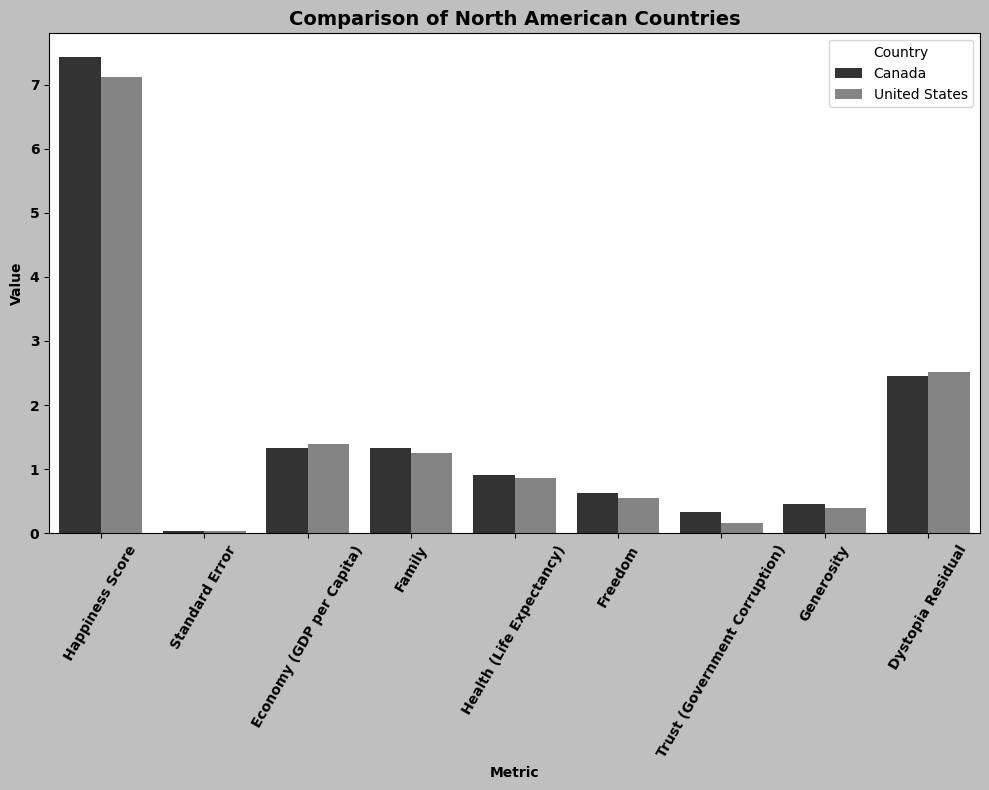

In [ ]:
# Set the figure size
import matplotlib.style as style
style.use('grayscale')
plt.figure(figsize=(10, 8))

# Plotting
sns.barplot(x='variable', y='value', hue='Country', data=region_df_melt, alpha=0.8)

plt.title('Comparison of North American Countries', weight='bold', size=14)
plt.ylabel('Value', weight='bold', size=10)
plt.xlabel('Metric', weight='bold', size=10)
plt.xticks(rotation=60)  # Rotate labels for better visibility

# Change x-tick and y-tick labels
ax = plt.gca()  # Get the current Axes instance
for label in ax.get_xticklabels():
    label.set_color('black')  # Change color
    label.set_weight('extra bold')  # Change weight
    label.set_size('10')

for label in ax.get_yticklabels():
    label.set_color('black')  # Change color
    label.set_weight('bold')  # Change weight
    label.set_size('10')

plt.tight_layout()  # Adjust subplot parameters to give specified padding
plt.show()


In [ ]:
/content/drive/MyDrive/Dataset/World_Happiness_2015.csv

In [ ]:
world_happiness = pd.read_csv('/content/drive/MyDrive/Dataset/World_Happiness_2015.csv')

Methods	Description
mean()	Calculates the mean of groups.
sum()	Calculates the sum of group values.
size()	Calculates the size of the groups.
count()	Calculates the count of values in groups.
min()	Calculates the minimum of group values.
max()	Calculates the maximum of group values.

In [ ]:
world_happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Score                158 non-null    float64
 3   Standard Error                 158 non-null    float64
 4   Economy (GDP per Capita)       158 non-null    float64
 5   Family                         158 non-null    float64
 6   Health (Life Expectancy)       158 non-null    float64
 7   Freedom                        158 non-null    float64
 8   Trust (Government Corruption)  158 non-null    float64
 9   Generosity                     158 non-null    float64
 10  Dystopia Residual              158 non-null    float64
dtypes: float64(9), object(2)
memory usage: 13.7+ KB


In [ ]:
grouped = world_happiness.groupby('Region')
happy_grouped = grouped['Happiness Score']
happy_mean = happy_grouped.mean()
happy_mean.sort_values()

Region
Sub-Saharan Africa                 4.202800
Southern Asia                      4.580857
Southeastern Asia                  5.317444
Central and Eastern Europe         5.332931
Middle East and Northern Africa    5.406900
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Western Europe                     6.689619
North America                      7.273000
Australia and New Zealand          7.285000
Name: Happiness Score, dtype: float64

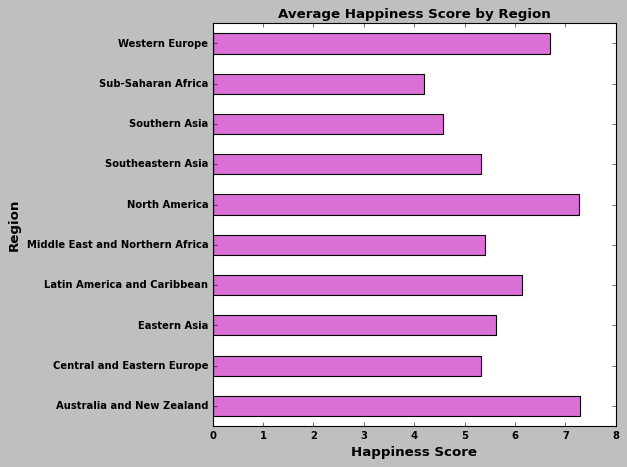

In [ ]:
import matplotlib.pyplot as plt
style.use('classic')

# Assuming happy_mean is sorted
happy_mean.plot(kind='barh', color='orchid', edgecolor='black')

plt.title('Average Happiness Score by Region', fontsize='12', weight='extra bold')
plt.xlabel('Happiness Score', fontsize='12', weight='extra bold')
plt.ylabel('Region', fontsize='12',
           weight='extra bold')

ax = plt.gca()

for tick in ax.get_xticklabels():
    tick.set_fontsize(9)  # Change size
    tick.set_weight('bold')  # Change weight

for tick in ax.get_yticklabels():
    tick.set_fontsize(9)  # Change size
    tick.set_weight('bold')  # Change weight


plt.tight_layout()
plt.show()


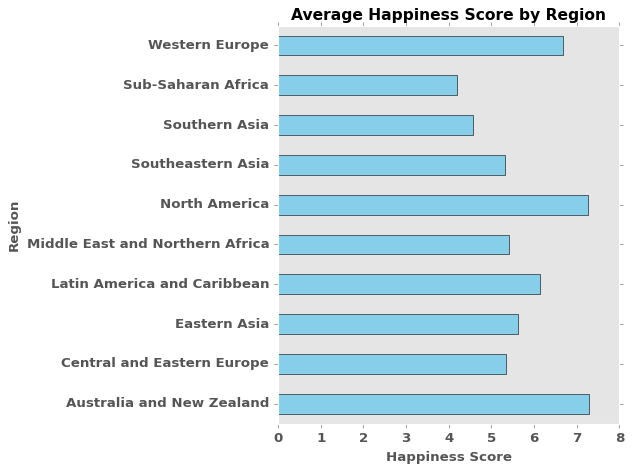

In [ ]:
import matplotlib.pyplot as plt
style.use('ggplot')
# Assuming happy_mean is sorted
happy_mean.plot(kind='barh', color='skyblue', edgecolor='black')

plt.title('Average Happiness Score by Region', weight='bold', size=14)
plt.xlabel('Happiness Score', weight='bold', size=12)
plt.ylabel('Region', weight='bold', size=12)

# Get current axes
ax = plt.gca()
ax.grid(visible=None, which='major')
# Modify properties of x-tick and y-tick labels
for tick in ax.get_xticklabels():
    tick.set_fontsize(12)  # Change size
    tick.set_weight('bold')  # Change weight

for tick in ax.get_yticklabels():
    tick.set_fontsize(12)  # Change size
    tick.set_weight('bold')  # Change weight

plt.tight_layout()
plt.show()


In [ ]:

life_grouped = grouped['Health (Life Expectancy)']
life_mean = life_grouped.mean()
life_mean.sort_values()


Region
Sub-Saharan Africa                 0.282332
Southern Asia                      0.540830
Southeastern Asia                  0.677357
Latin America and Caribbean        0.703870
Middle East and Northern Africa    0.705615
Central and Eastern Europe         0.718774
Eastern Asia                       0.877388
North America                      0.883710
Western Europe                     0.909148
Australia and New Zealand          0.919965
Name: Health (Life Expectancy), dtype: float64

In [ ]:
# Selecting multiple columns requires a list of column names
life_gdp_grouped = grouped[['Health (Life Expectancy)', 'Economy (GDP per Capita)']]

life_gdp_mean = life_gdp_grouped.mean()

# You can sort by a specific column
life_gdp_mean = life_gdp_mean.sort_values(by='Health (Life Expectancy)')

print(life_gdp_mean)

                                 Health (Life Expectancy)  \
Region                                                      
Sub-Saharan Africa                               0.282332   
Southern Asia                                    0.540830   
Southeastern Asia                                0.677357   
Latin America and Caribbean                      0.703870   
Middle East and Northern Africa                  0.705615   
Central and Eastern Europe                       0.718774   
Eastern Asia                                     0.877388   
North America                                    0.883710   
Western Europe                                   0.909148   
Australia and New Zealand                        0.919965   

                                 Economy (GDP per Capita)  
Region                                                     
Sub-Saharan Africa                               0.380473  
Southern Asia                                    0.560486  
Southeastern Asia          

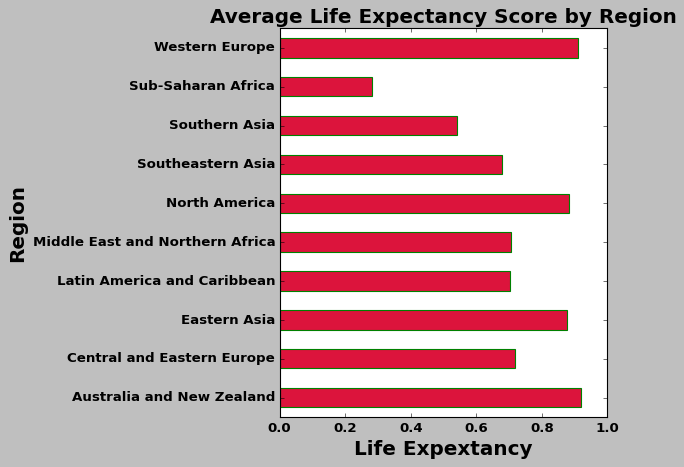

In [ ]:
import matplotlib.pyplot as plt
style.use('classic')

# Assuming happy_mean is sorted
life_mean.plot(kind='barh', color='crimson', edgecolor='green')

plt.title('Average Life Expectancy Score by Region', fontsize='18', weight='extra bold')
plt.xlabel('Life Expextancy', fontsize='18', weight='extra bold')
plt.ylabel('Region', fontsize='18',
           weight='extra bold')


ax = plt.gca()
ax.grid(visible=None, which='minor')


for tick in ax.get_xticklabels():
    tick.set_fontsize(12)  # Change size
    tick.set_weight('bold')  # Change weight

for tick in ax.get_yticklabels():
    tick.set_fontsize(12)  # Change size
    tick.set_weight('bold')  # Change weight


plt.tight_layout()
plt.show()


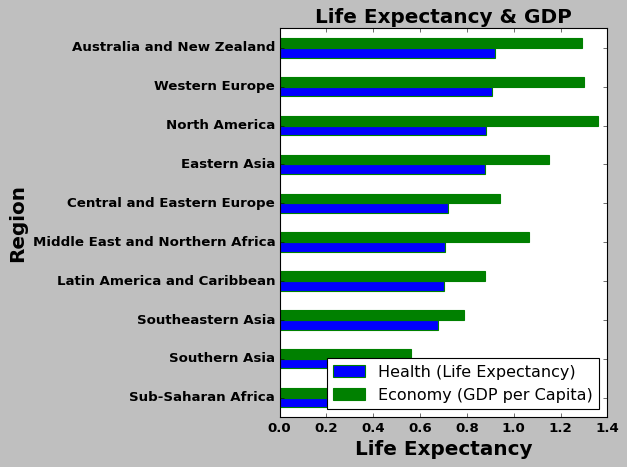

In [ ]:
import matplotlib.pyplot as plt

style.use('classic')
# Assuming life_mean is sorted
life_gdp_mean.plot(kind='barh',  edgecolor='green')

plt.title('Life Expectancy & GDP', fontsize='18', weight='extra bold')
plt.xlabel('Life Expectancy', fontsize='18', weight='extra bold')
plt.ylabel('Region', fontsize='18', weight='extra bold')

ax = plt.gca()
ax.grid(visible=None, which='minor')

for tick in ax.get_xticklabels():
    tick.set_fontsize(12)  # Change size
    tick.set_weight('bold')  # Change weight

for tick in ax.get_yticklabels():
    tick.set_fontsize(12)  # Change size
    tick.set_weight('bold')  # Change weight

plt.legend(loc='lower right')

plt.tight_layout()
plt.show()


In [ ]:
life_gdp_mean.corr()

,Health (Life Expectancy),Economy (GDP per Capita)
Health (Life Expectancy),1.000000,0.956739
Economy (GDP per Capita),0.956739,1.000000


In [ ]:
import numpy as np
grouped = world_happiness.groupby('Region')
happy_grouped = grouped['Happiness Score']
def dif(group):
    return (group.max() - group.mean())
happy_mean_max = happy_grouped.agg([np.mean, np.max]) 
mean_max_dif = happy_grouped.agg(dif)

print(mean_max_dif)

Region
Australia and New Zealand          0.001000
Central and Eastern Europe         1.172069
Eastern Asia                       0.671833
Latin America and Caribbean        1.081318
Middle East and Northern Africa    1.871100
North America                      0.154000
Southeastern Asia                  1.480556
Southern Asia                      0.672143
Sub-Saharan Africa                 1.274200
Western Europe                     0.897381
Name: Happiness Score, dtype: float64


In [ ]:
import numpy as np

grouped = world_happiness.groupby('Region')
happy_grouped = grouped['Happiness Score']

def dif(group):
    return (group.max() - group.mean())

happy_mean_max = happy_grouped.agg([np.mean, np.max])
mean_max_dif = happy_grouped.agg(dif).rename("diff")  # Give the series a name for the column in the DataFrame

# Concatenate along columns axis
result = pd.concat([happy_mean_max, mean_max_dif], axis=1)

print(result)


                                     mean   amax      diff
Region                                                    
Australia and New Zealand        7.285000  7.286  0.001000
Central and Eastern Europe       5.332931  6.505  1.172069
Eastern Asia                     5.626167  6.298  0.671833
Latin America and Caribbean      6.144682  7.226  1.081318
Middle East and Northern Africa  5.406900  7.278  1.871100
North America                    7.273000  7.427  0.154000
Southeastern Asia                5.317444  6.798  1.480556
Southern Asia                    4.580857  5.253  0.672143
Sub-Saharan Africa               4.202800  5.477  1.274200
Western Europe                   6.689619  7.587  0.897381


In [ ]:
import numpy as np
import pandas as pd

def dif(group):
    return (group.max() - group.mean())

grouped = world_happiness.groupby('Region')

# Initialize an empty DataFrame to store the results
results = pd.DataFrame()

for column in world_happiness.columns:
    # Skip non-numeric columns
    if pd.api.types.is_numeric_dtype(world_happiness[column]):
        grouped_column = grouped[column]
        mean_max = grouped_column.agg([np.mean, np.max])
        diff = grouped_column.agg(dif).rename("diff")
        
        # Concatenate the results and add a multi-level column index
        result = pd.concat([mean_max, diff], axis=1)
        result.columns = pd.MultiIndex.from_product([[column], result.columns])
        
        # Concatenate the results along the columns axis
        results = pd.concat([results, result], axis=1)

print(results.head(10))


                                Happiness Score                   \
                                           mean   amax      diff   
Region                                                             
Australia and New Zealand              7.285000  7.286  0.001000   
Central and Eastern Europe             5.332931  6.505  1.172069   
Eastern Asia                           5.626167  6.298  0.671833   
Latin America and Caribbean            6.144682  7.226  1.081318   
Middle East and Northern Africa        5.406900  7.278  1.871100   
North America                          7.273000  7.427  0.154000   
Southeastern Asia                      5.317444  6.798  1.480556   
Southern Asia                          4.580857  5.253  0.672143   
Sub-Saharan Africa                     4.202800  5.477  1.274200   
Western Europe                         6.689619  7.587  0.897381   

                                Standard Error                     \
                                          mean

In [ ]:
results.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, Australia and New Zealand to Western Europe
Data columns (total 27 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   (Happiness Score, mean)                10 non-null     float64
 1   (Happiness Score, amax)                10 non-null     float64
 2   (Happiness Score, diff)                10 non-null     float64
 3   (Standard Error, mean)                 10 non-null     float64
 4   (Standard Error, amax)                 10 non-null     float64
 5   (Standard Error, diff)                 10 non-null     float64
 6   (Economy (GDP per Capita), mean)       10 non-null     float64
 7   (Economy (GDP per Capita), amax)       10 non-null     float64
 8   (Economy (GDP per Capita), diff)       10 non-null     float64
 9   (Family, mean)                         10 non-null     float64
 10  (Family, amax)                         10 non

DF pivot table method

In [ ]:
pv_world_happiness = world_happiness.pivot_table(values='Happiness Score', index='Region', aggfunc=np.mean, margins='True')

In [ ]:
print(pv_world_happiness)

                                 Happiness Score
Region                                          
Australia and New Zealand               7.285000
Central and Eastern Europe              5.332931
Eastern Asia                            5.626167
Latin America and Caribbean             6.144682
Middle East and Northern Africa         5.406900
North America                           7.273000
Southeastern Asia                       5.317444
Southern Asia                           4.580857
Sub-Saharan Africa                      4.202800
Western Europe                          6.689619
All                                     5.375734


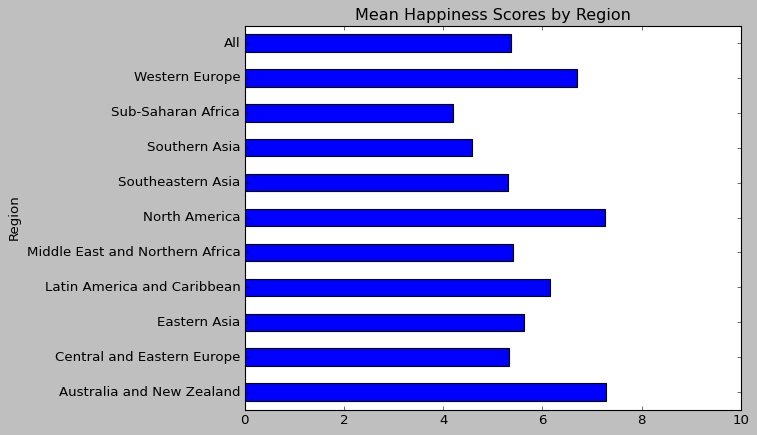

In [ ]:

pv_world_happiness.plot(kind='barh', title='Mean Happiness Scores by Region', xlim=(0,10), legend=False)
plt.show()

In [ ]:
world_happiness_mean = world_happiness['Happiness Score'].mean()
print(world_happiness_mean)

5.375734177215189


In [ ]:
grouped_by_region = world_happiness.pivot_table(['Happiness Score', 'Family'], 'Region')

In [ ]:
print(grouped_by_region)

                                   Family  Happiness Score
Region                                                    
Australia and New Zealand        1.314450         7.285000
Central and Eastern Europe       1.053042         5.332931
Eastern Asia                     1.099427         5.626167
Latin America and Caribbean      1.104720         6.144682
Middle East and Northern Africa  0.920490         5.406900
North America                    1.284860         7.273000
Southeastern Asia                0.940468         5.317444
Southern Asia                    0.645321         4.580857
Sub-Saharan Africa               0.809085         4.202800
Western Europe                   1.247302         6.689619


In [ ]:
mean_min_max_by_region = world_happiness.pivot_table('Happiness Score', 'Region', aggfunc=[np.mean, np.min , np.max], margins=True)

In [ ]:
print(mean_min_max_by_region)

                                           mean            amin  \
                                Happiness Score Happiness Score   
Region                                                            
Australia and New Zealand              7.285000           7.284   
Central and Eastern Europe             5.332931           4.218   
Eastern Asia                           5.626167           4.874   
Latin America and Caribbean            6.144682           4.518   
Middle East and Northern Africa        5.406900           3.006   
North America                          7.273000           7.119   
Southeastern Asia                      5.317444           3.819   
Southern Asia                          4.580857           3.575   
Sub-Saharan Africa                     4.202800           2.839   
Western Europe                         6.689619           4.857   
All                                    5.375734           2.839   

                                           amax  
           

In [ ]:
whgr = world_happiness.groupby('Region')
grouped_h_f = whgr[['Happiness Score', 'Family']]

happy_family_stats = grouped_h_f.agg([np.min, np.max, np.mean])
print(happy_family_stats)

                                Happiness Score                    Family  \
                                           amin   amax      mean     amin   
Region                                                                      
Australia and New Zealand                 7.284  7.286  7.285000  1.30923   
Central and Eastern Europe                4.218  6.505  5.332931  0.38562   
Eastern Asia                              4.874  6.298  5.626167  0.94675   
Latin America and Caribbean               4.518  7.226  6.144682  0.74302   
Middle East and Northern Africa           3.006  7.278  5.406900  0.47489   
North America                             7.119  7.427  7.273000  1.24711   
Southeastern Asia                         3.819  6.798  5.317444  0.62736   
Southern Asia                             3.575  5.253  4.580857  0.30285   
Sub-Saharan Africa                        2.839  5.477  4.202800  0.00000   
Western Europe                            4.857  7.587  6.689619  0.89318   

In [ ]:
pv_happy_family_stats = world_happiness.pivot_table(['Happiness Score', 'Family'], 'Region', aggfunc=[np.min, np.max, np.mean], margins=True)
print(pv_happy_family_stats.head())

                                    amin                     amax  \
                                  Family Happiness Score   Family   
Region                                                              
Australia and New Zealand        1.30923           7.284  1.31967   
Central and Eastern Europe       0.38562           4.218  1.34043   
Eastern Asia                     0.94675           4.874  1.30060   
Latin America and Caribbean      0.74302           4.518  1.30477   
Middle East and Northern Africa  0.47489           3.006  1.22393   

                                                     mean                  
                                Happiness Score    Family Happiness Score  
Region                                                                     
Australia and New Zealand                 7.286  1.314450        7.285000  
Central and Eastern Europe                6.505  1.053042        5.332931  
Eastern Asia                              6.298  1.099427        5.